# Exploratory Data Analysis
In this notebook, we will be doing preliminary analysis on one of our datasets (2015). 

From this, we hope to find:
- Interesting observations about world happiness and its variables
- More information about the variables
- Trends about the data
- A way to visualise the data 

At the same time, we will be appplying the following regression models to find out which is the best to predict happiness score:
1. Linear Regression with K-Fold cross validation
2. Random Forest Regression
3. Gradient Boosting Regression
4. Ridge Regression
5. Huber Regression

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
data= pd.read_csv('../uncleaned_data/2015.csv')
data

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

We can see that the variables have only float, integer and object type data values, and are mostly numerical in nature.

We can infer that perhaps some of these columns affect rank and happiness, but which one will have the most impact?

The countries are divided into regions too. We can perhaps ask: which region is the happiest?

We can see that The variables that will help predict Happiness Score and Happiness Rank are:
1. Economy (GDP per Capita)
1. Family
1. Health (Life Expectancy)
1. Freedom
1. Trust (Government Corruption)
1. Generosity
1. Dystopia Residual

For the sake of readability and convenience, we will be renaming some of these variables
We will also be deleting rows with any null values.

In [4]:
data = data.rename(columns={'Economy (GDP per Capita)':'Economy','Health (Life Expectancy)':'Health','Trust (Government Corruption)':'Trust','Happiness Score':'Score','Dystopia Residual':'Dystopia','Happiness Rank':'Rank' })
data = data.dropna()

In [5]:
data.describe()

,Rank,Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


We can observe that for the variables we have here, the mean and the median do not differ much. This shows us that there are not many outliers in the dataset. We will make a new dataframe which contains only important variables in predicting the Happiness Score.

In [6]:
compare=pd.DataFrame(data[["Score","Economy","Family","Health","Freedom","Trust","Generosity","Dystopia"]])
compare.describe()

,Score,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,1.145010,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,2.839000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,4.526000,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,5.232500,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,6.243750,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,7.587000,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


As we can see, there are 7 variables that could determine score. Let us take a look at the distribution of these variables

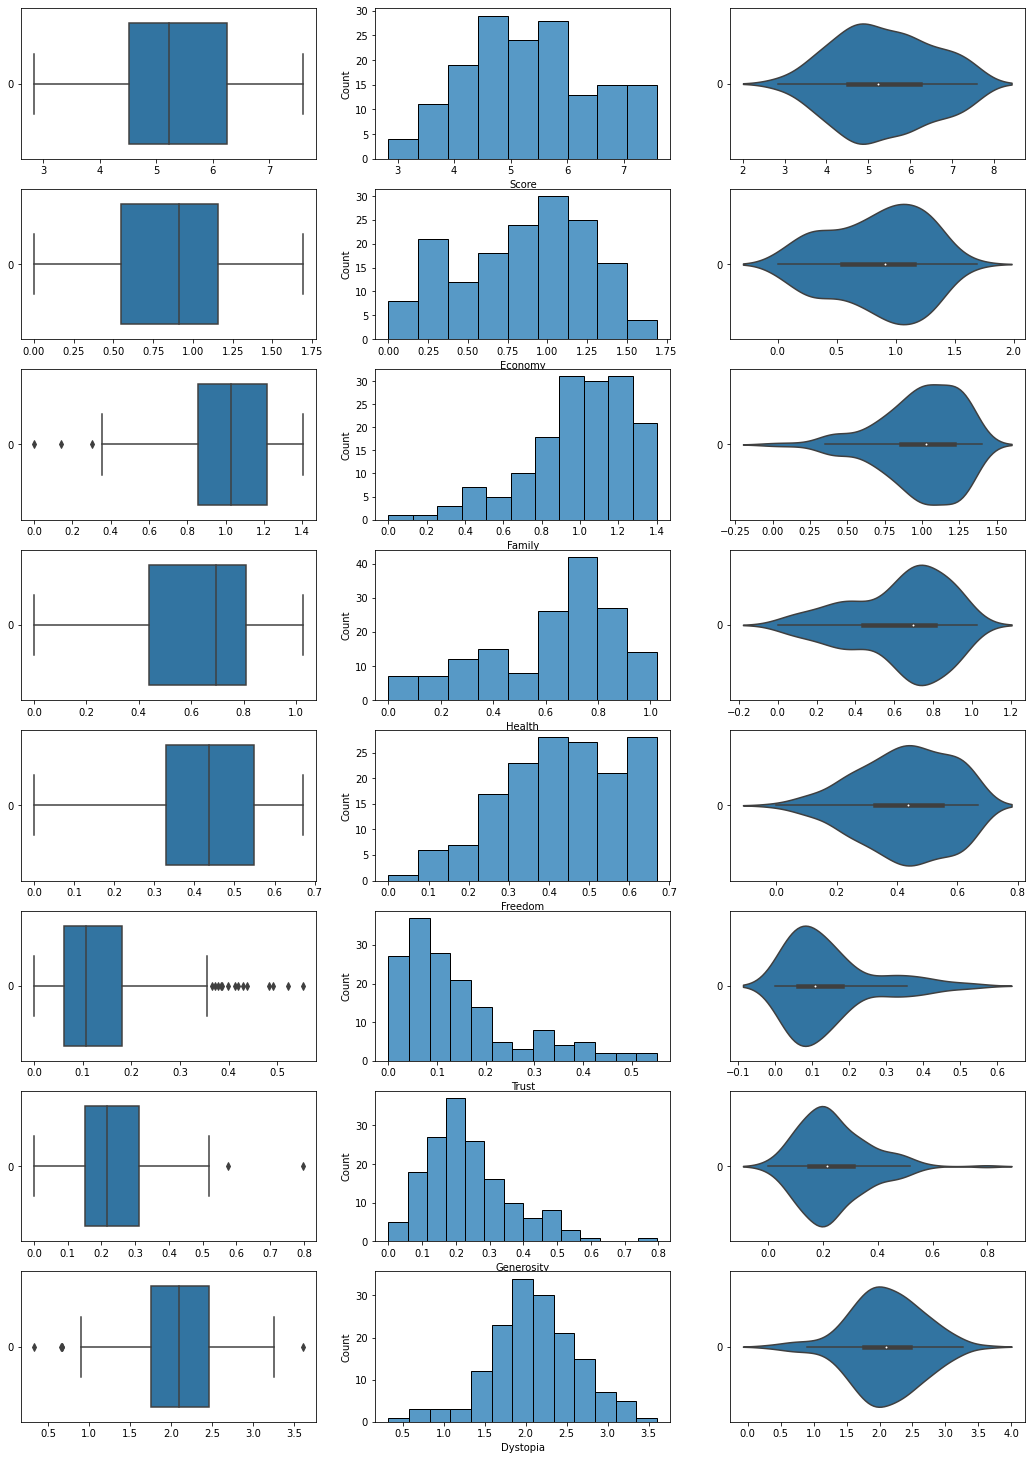

In [7]:
# Draw the distributions of all variables
f, axes = plt.subplots(8, 3, figsize=(18, 26))

count = 0
for var in compare:
    sb.boxplot(data = compare[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = compare[var], ax = axes[count,1])
    sb.violinplot(data = compare[var], orient = "h", ax = axes[count,2])
    count += 1
    

Some interesting takeaways:
- The median happiness score is just above 5. Minimum score is around 3, so range (1,2) is not used.
- Family, Health and Freedom all have positive skews. This could indicate that these variables are highly abundant in all countries.
- Trust and Generosity has negative skews.
- Trust has the most outliers, with a lot of data points exceeding the upper quartile. This indicates that there is a big group of countries that have high trust despite the rest of the world having low trust. 

Let us now take a look at the correlation of these variables

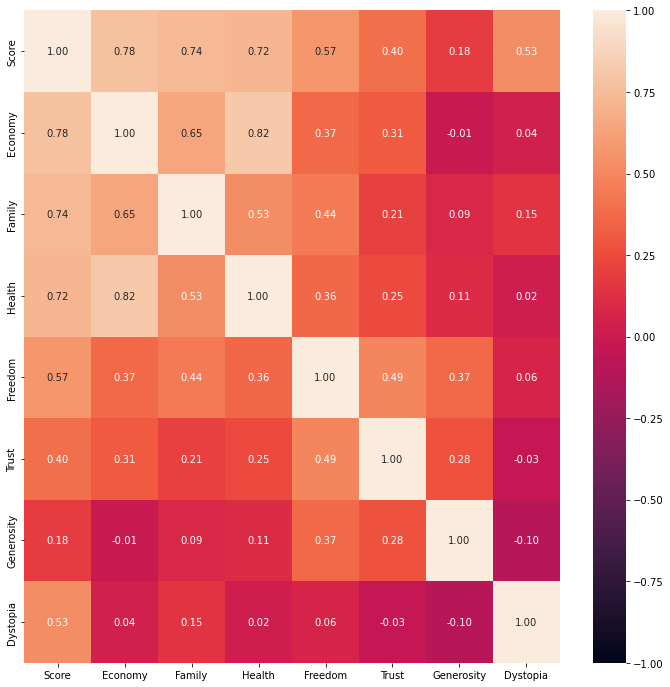

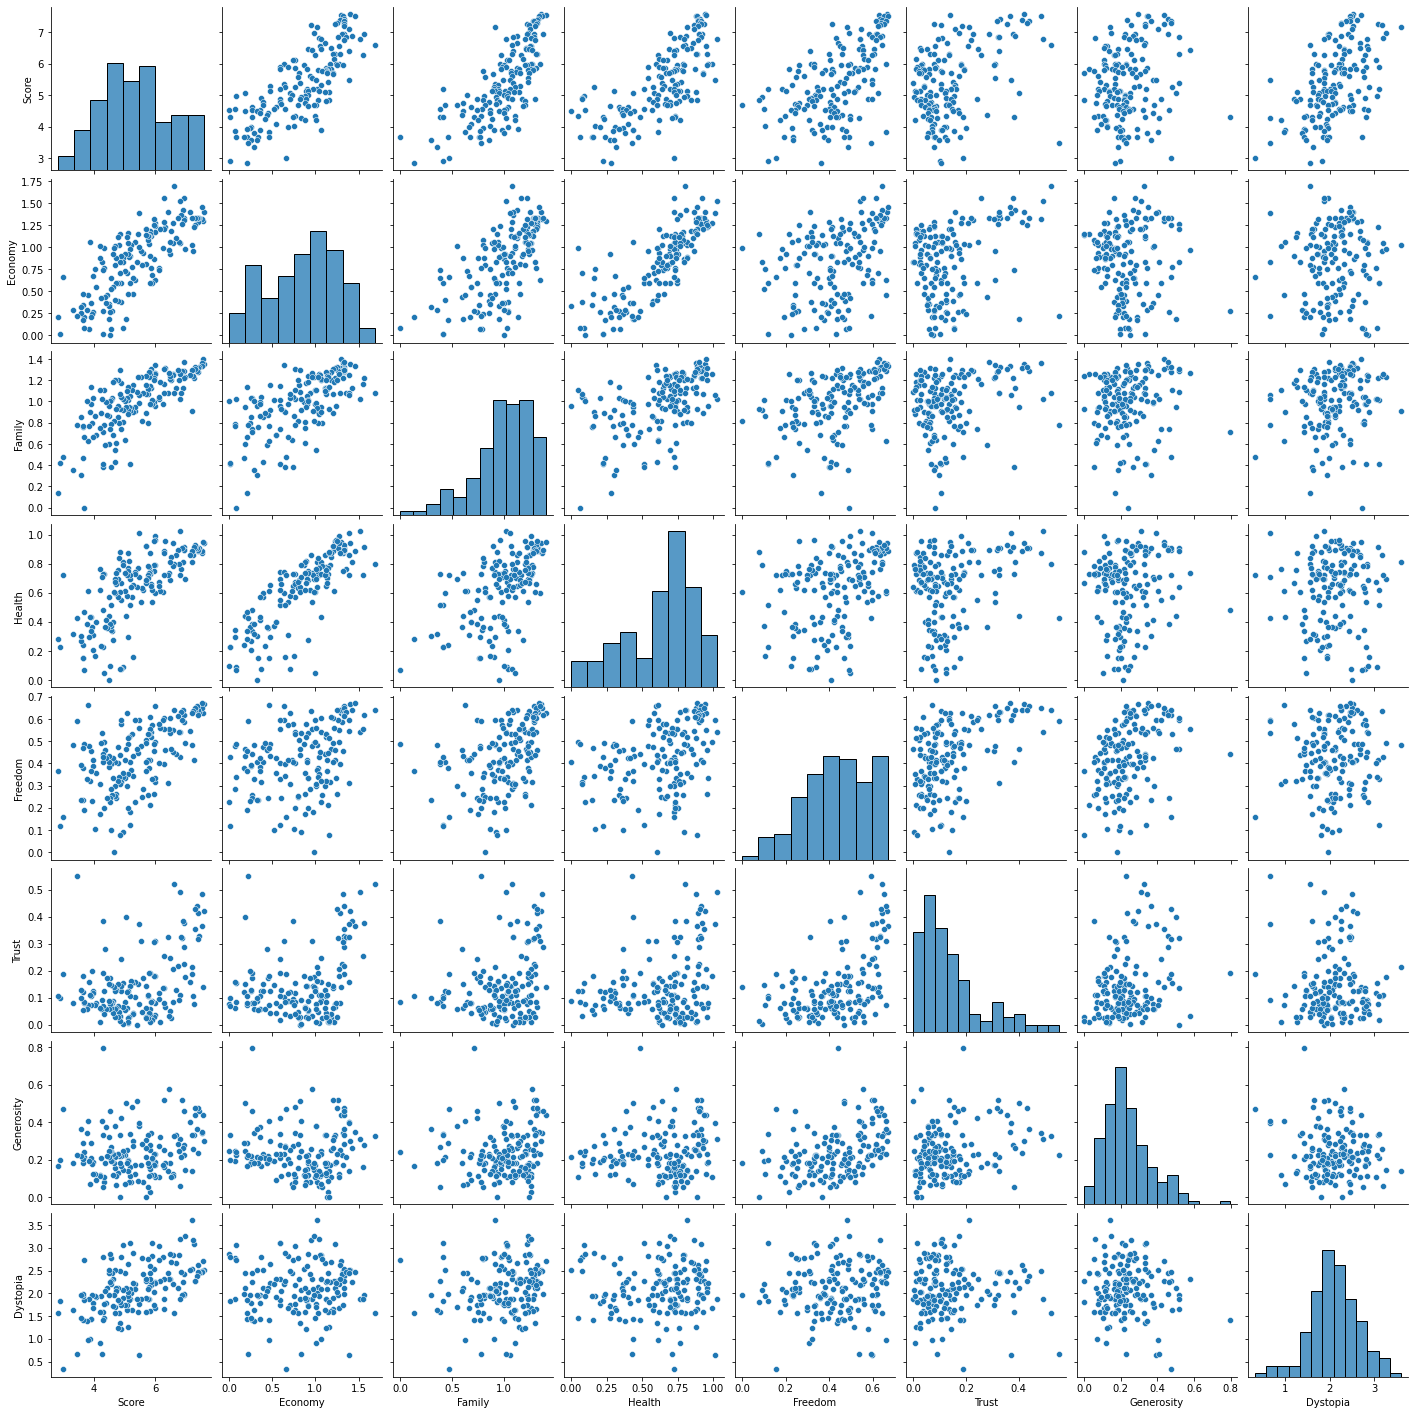

In [8]:
f = plt.figure(figsize=(12, 12))
sb.heatmap(compare.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")
compare.corr()
sb.pairplot(data = compare)

As we can see, Economy, Family and Health and Freedom have the highest correlation coefficients. These are the most important variables in predicting score. An interesting observation is that the variables with positive skew seem to have good correlation, perhaps this is why the minimum score is 3 and mean, median are over 5. At the same time, we can see that generosity is a bad factor when predicting score.

Now that we have learnt more about these variables, what other takeaway can we have from our dataset? Perhaps we could find trends of score and variables based on the region of the countries? Lets try.

In [9]:
regional_data=pd.DataFrame(data[["Region","Score","Economy","Family","Health","Freedom","Trust","Generosity","Dystopia"]])
regional_data.groupby(by="Region").mean()

,Score,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia
Region,,,,,,,,
Australia and New Zealand,7.285000,1.291880,1.314450,0.919965,0.645310,0.392795,0.455315,2.265355
Central and Eastern Europe,5.332931,0.942438,1.053042,0.718774,0.358269,0.086674,0.152264,2.021400
Eastern Asia,5.626167,1.151780,1.099427,0.877388,0.462490,0.127695,0.225885,1.681607
Latin America and Caribbean,6.144682,0.876815,1.104720,0.703870,0.501740,0.117172,0.217788,2.622577
Middle East and Northern Africa,5.406900,1.066974,0.920490,0.705615,0.361751,0.181702,0.190376,1.980008
North America,7.273000,1.360400,1.284860,0.883710,0.589505,0.244235,0.429580,2.480935
Southeastern Asia,5.317444,0.789054,0.940468,0.677357,0.557104,0.151276,0.419261,1.783020
Southern Asia,4.580857,0.560486,0.645321,0.540830,0.373337,0.102536,0.341429,2.016769
Sub-Saharan Africa,4.202800,0.380473,0.809085,0.282332,0.365944,0.123878,0.221137,2.019980


There seems to be quite a difference of the mean happiness score amongst regions. Let's see what this looks like on a map.

In [38]:
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected=True)


def world_map_plot(var):
    d = dict(
        type = 'choropleth',
        colorscale = 'Viridis',
        marker_line_width = 1,
        locations = data['Country'],
        locationmode = 'country names',
        z = data[var],
        text = data["Country"],
        colorbar = {'title' : var}
    )
    
    layout = dict(title = f'World Map for {var}',
    geo = dict(projection = {'type' : 'mercator'}, showocean = False, showlakes=True, showrivers=True))
    choromap = go.Figure(data=[d], layout=layout)
    choromap.update_layout(autosize=False, width=800, height=800)
    choromap.show()

    

world_map_plot('Score')

This is the geographic plot for Happiness Score. As we can see, the left side of the map seems to have much higher happiness score compared to the right side. This could be due to difference in culture, or the grading of happiness being favorable towards Western countries and unfavorable towards Eastern and Asian ones. Let us take a look at some of the maps of other variables.

In [40]:
for var in regional_data.columns:
    if var not in ['Region', 'Score']:
        world_map_plot(var)

These findings generally match our analysis of variables above. Variables with positive skew produce brighter maps while those with negative skew produce much darker maps.

North Ameria is also consistently bright for while Africa is consistently dark for all variables. This also falls in line, as these are the regions with highest and lowest mean Happiness Score.

# Regression Modelling
We have found out a lot about our dataset. However, if we want to make use of this data, we will need to find a suitable model that can help us predict Happiness Score based on the variables. In order to do so, we will be applying the following models and comparing their **Mean Squared Error (MSE)** and **Explained Variance (R^2)** in order to find the best model for our dataset:

1. Linear Regression with K-Fold cross validation
2. Random Forest Regression
3. Gradient Boosting Regression
4. Ridge Regression
5. Huber Regression


We will be using the compare dataset previously used

In [12]:
X = compare[["Economy","Family","Health","Freedom","Trust","Generosity","Dystopia"]]
y = compare['Score']
print(X.shape, y.shape)

(158, 7) (158,)


In [13]:
from sklearn.model_selection import train_test_split 

# Getting and Using the same train test split for all regression models
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

## 1. Linear Regression with K-Fold cross validation
Linear regression is a linear model that assumes a linear relationship between the input variables X and the output variable y. K-Fold cross validation repeats this linear model on multiple train-test splits and averages it in order to find the average fit

In [14]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [15]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# K-Fold cross validation technique
validation_type = KFold(n_splits = 10, random_state = 100, shuffle = True)

# Cross validation score of Linear Regression model
cv_lr_train = cross_val_score(lr, X_train, y_train, cv = validation_type, scoring = "r2")
cv_lr_test = cross_val_score(lr, X_test, y_test, cv = validation_type, scoring = "r2")
print(f"train: {cv_lr_train}")
print(f"test: {cv_lr_test}")
print()
print(f"Linear Regression R^2 (train): {cv_lr_train.mean():.3f}")
print(f"Linear Regression R^2 (test): {cv_lr_test.mean():.3f}")

train: [0.99999994 0.99999993 0.99999993 0.99999996 0.99999994 0.99999993
 0.99999992 0.99999991 0.99999989 0.99999977]
test: [0.99999995 0.99999915 0.99999986 0.99999984 0.99999992 0.99999993
 0.99999987 0.99999914 0.99999996 0.99999988]

Linear Regression R^2 (train): 1.000
Linear Regression R^2 (test): 1.000


In [16]:
from sklearn.metrics import mean_squared_error

# Predict test set and calculate mean squared error
predict = lr.predict(X_test)
print(f"Linear Regression MSE (test): {mean_squared_error(y_test, predict):.3f}")
print(f"Linear Regression RMSE (test): {np.sqrt(mean_squared_error(y_test, predict)):.3f}")
print(f"Intercept of regression: {lr.intercept_:3f}")
print(f"Coefficients of regression:", lr.coef_)

Linear Regression MSE (test): 0.000
Linear Regression RMSE (test): 0.000
Intercept of regression: 0.000172
Coefficients of regression: [1.00008094 0.99988923 0.99987764 0.99961884 1.00007708 1.00003367
 1.00002415]


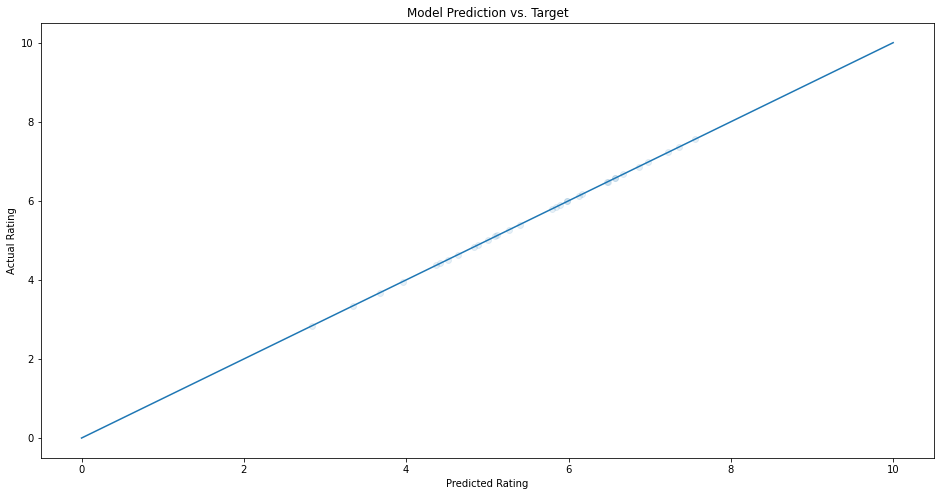

In [17]:
f = plt.figure(figsize=(16, 8))
plt.scatter(predict, y_test, alpha = 0.1)
plt.plot(np.linspace(0, 10), np.linspace(0, 10))
plt.title('Model Prediction vs. Target')
plt.xlabel('Predicted Rating')
plt.ylabel('Actual Rating');

In [18]:
import scipy.stats as stats

def diagnostic_plot(x, y):
    plt.figure(figsize = (20,5))

    plt.subplot(1, 3, 1)
    plt.scatter(x, y, alpha = 0.1)
    plt.plot(x, x, color = "blue", linewidth = 1)
    plt.title("Regression Fit")
    plt.xlabel("x")
    plt.ylabel("y")
    
    plt.subplot(1, 3, 2)
    res = y - x
    plt.scatter(x, res, alpha = 0.1)
    plt.title("Residual Plot")
    plt.xlabel("Prediction")
    plt.ylabel("Residuals")
    
    plt.subplot(1, 3, 3)
    # Generates a probability plot of sample data against the quantiles of a specified theoretical distribution 
    stats.probplot(res, dist = "norm", plot = plt)
    plt.title("Normal Q-Q plot");

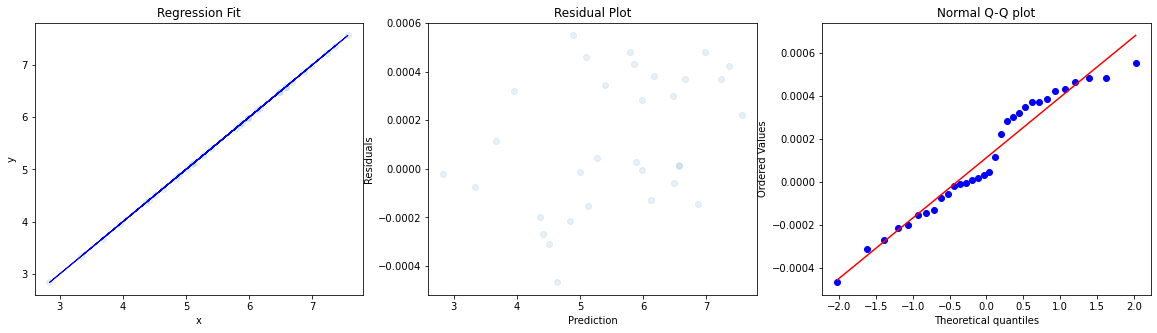

In [19]:
diagnostic_plot(predict, y_test)

## 2. Random Forest Regression
Random Forest fits a number of classifying **decision trees on various sub-samples** of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 

In [20]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state = 100)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=100)

In [21]:
cv_rf_train = cross_val_score(rf, X_train, y_train, cv = validation_type, scoring = "r2")
print(f"Random Forest Regressor R^2 (train): {cv_rf_train.mean():.3f}")
cv_rf_test = cross_val_score(rf, X_test, y_test, cv = validation_type, scoring = "r2")
print(f"Random Forest Regressor R^2 (test): {cv_rf_test.mean():.3f}")
print()

rf_predict = rf.predict(X_test)
print(f"Random Forest Regressor MSE (test): {mean_squared_error(y_test, rf_predict):.3f}")
print(f"Random Forest Regressor RMSE (test): {np.sqrt(mean_squared_error(y_test, rf_predict)):.3f}")

Random Forest Regressor R^2 (train): 0.879
Random Forest Regressor R^2 (test): 0.585

Random Forest Regressor MSE (test): 0.145
Random Forest Regressor RMSE (test): 0.380


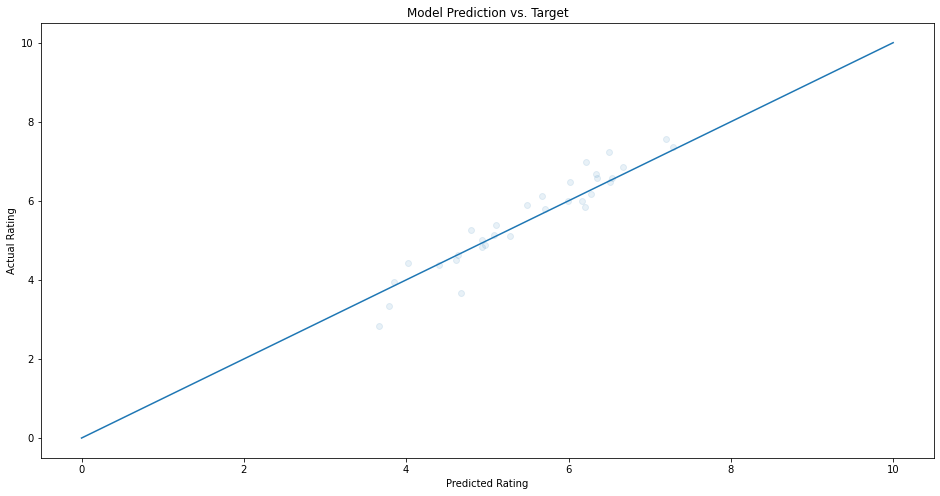

In [22]:
f = plt.figure(figsize=(16, 8))
plt.scatter(rf_predict, y_test, alpha = 0.1)
plt.plot(np.linspace(0, 10), np.linspace(0, 10))
plt.title('Model Prediction vs. Target')
plt.xlabel('Predicted Rating')
plt.ylabel('Actual Rating');

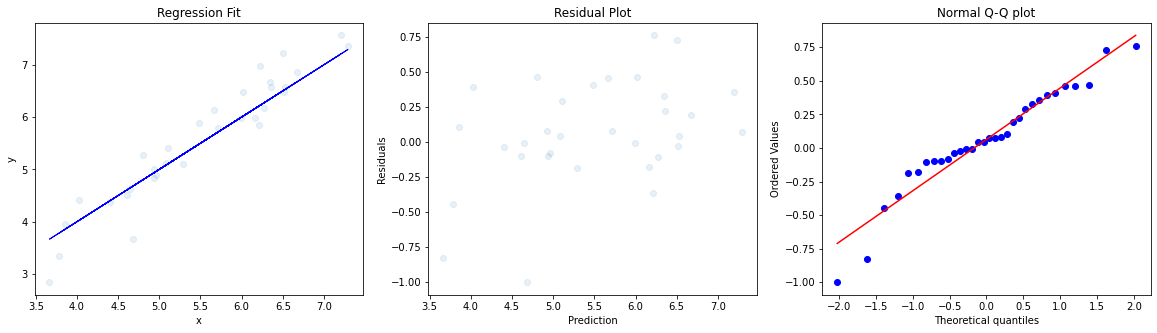

In [23]:
diagnostic_plot(rf_predict, y_test)

## 3. Gradient Boosting Regression
Gradient Boosting uses a loss function to be optimized, a weak learner (eg. decision trees) to make predictions, and an additive model (gradient descent) to add weak learners to minimize the loss function.

In [24]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state = 100)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(random_state=100)

In [25]:
cv_gbr_train = cross_val_score(gbr, X_train, y_train, cv = validation_type, scoring = "r2")
cv_gbr_test = cross_val_score(gbr, X_test, y_test, cv = validation_type, scoring = "r2")
print(f"train: {cv_gbr_train}")
print(f"test: {cv_gbr_test}")
print()
print(f"Gradient Boosting Regression R^2 (train): {cv_gbr_train.mean():.3f}")
print(f"Gradient Boosting Regression R^2 (test): {cv_gbr_test.mean():.3f}")
print()

gbr_predict = gbr.predict(X_test)
print(f"Gradient Boosting Regression MSE (test): {mean_squared_error(y_test, gbr_predict):.3f}")
print(f"Gradient Boosting Regression RMSE (test): {np.sqrt(mean_squared_error(y_test, gbr_predict)):.3f}")

train: [0.96594398 0.85773588 0.85552879 0.95295338 0.8654891  0.89428727
 0.91743227 0.87720367 0.9133706  0.88764888]
test: [ 0.87195628  0.5774905   0.34476165  0.63496604  0.8365495   0.77006928
  0.90026628 -0.60415338  0.94720947  0.584251  ]

Gradient Boosting Regression R^2 (train): 0.899
Gradient Boosting Regression R^2 (test): 0.586

Gradient Boosting Regression MSE (test): 0.114
Gradient Boosting Regression RMSE (test): 0.337


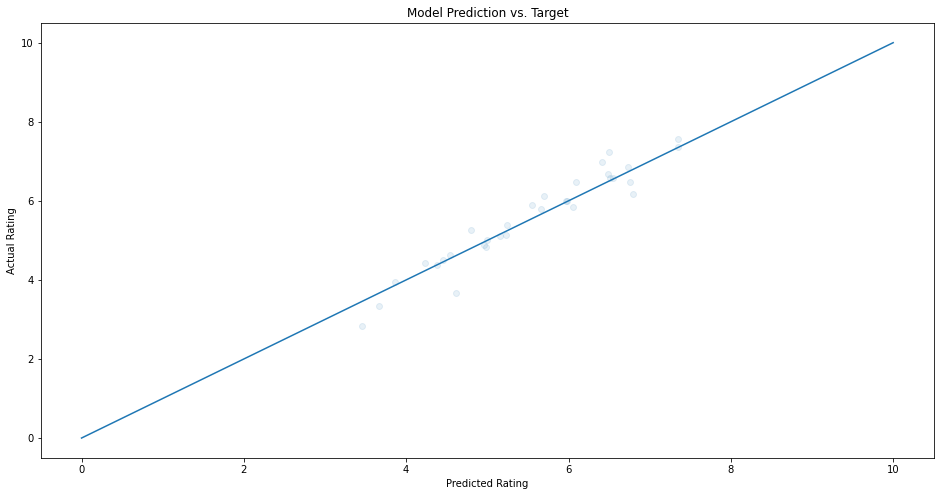

In [26]:
f = plt.figure(figsize=(16, 8))
plt.scatter(gbr_predict, y_test, alpha = 0.1)
plt.plot(np.linspace(0, 10), np.linspace(0, 10))
plt.title('Model Prediction vs. Target')
plt.xlabel('Predicted Rating')
plt.ylabel('Actual Rating');

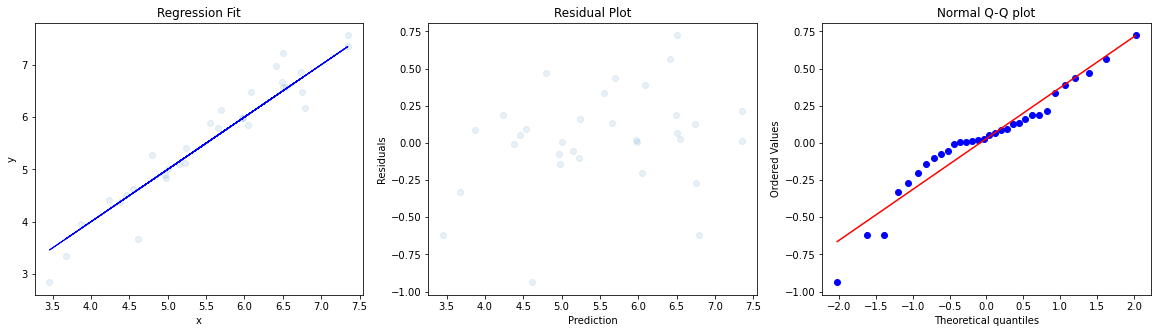

In [27]:
diagnostic_plot(gbr_predict, y_test)

## 4. Ridge Regression
Ridge regression is a method of estimating the coefficients of multiple-regression models in scenarios where linearly independent variables are highly correlated. It does this through linear least squares with l2 regularization top minimise the objective function.

In [28]:
from sklearn.linear_model import Ridge

ridge = Ridge(random_state = 100)
ridge.fit(X_train, y_train)

Ridge(random_state=100)

In [29]:
cv_ridge_train = cross_val_score(ridge, X_train, y_train, cv = validation_type, scoring = "r2")
cv_ridge_test = cross_val_score(ridge, X_test, y_test, cv = validation_type, scoring = "r2")
print(f"train: {cv_ridge_train}")
print(f"test: {cv_ridge_test}")
print()
print(f"Ridge Regression R^2 (train): {cv_ridge_train.mean():.3f}")
print(f"Ridge Regression R^2 (test): {cv_ridge_test.mean():.3f}")
print()

ridge_predict = ridge.predict(X_test)
print(f"Ridge Regression MSE (test): {mean_squared_error(y_test, ridge_predict):.3f}")
print(f"Ridge Regression RMSE (test): {np.sqrt(mean_squared_error(y_test, ridge_predict)):.3f}")

train: [0.99515233 0.99749744 0.9923384  0.99800828 0.9911634  0.9958778
 0.99424729 0.99457993 0.99253898 0.99759027]
test: [0.97989729 0.94097627 0.9415561  0.98832262 0.95465511 0.95630736
 0.97596158 0.78178808 0.9731208  0.97962869]

Ridge Regression R^2 (train): 0.995
Ridge Regression R^2 (test): 0.947

Ridge Regression MSE (test): 0.003
Ridge Regression RMSE (test): 0.058


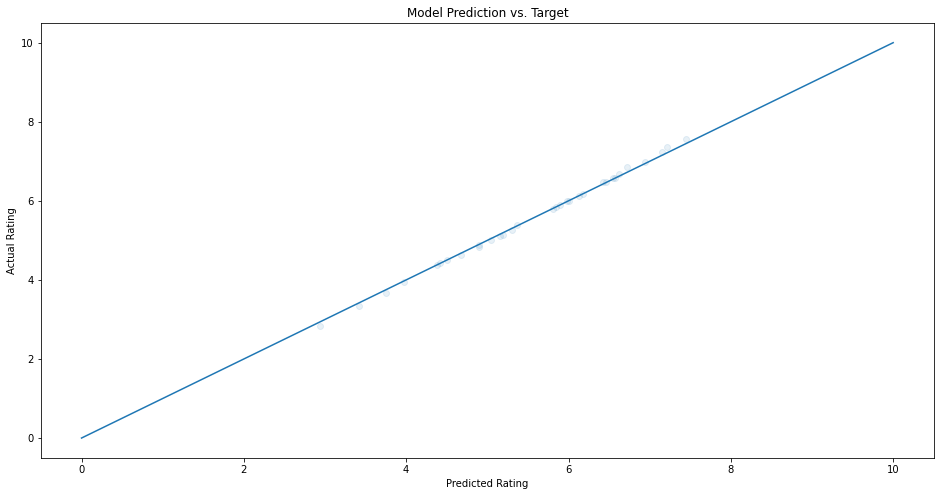

In [30]:
f = plt.figure(figsize=(16, 8))
plt.scatter(ridge_predict, y_test, alpha = 0.1)
plt.plot(np.linspace(0, 10), np.linspace(0, 10))
plt.title('Model Prediction vs. Target')
plt.xlabel('Predicted Rating')
plt.ylabel('Actual Rating');

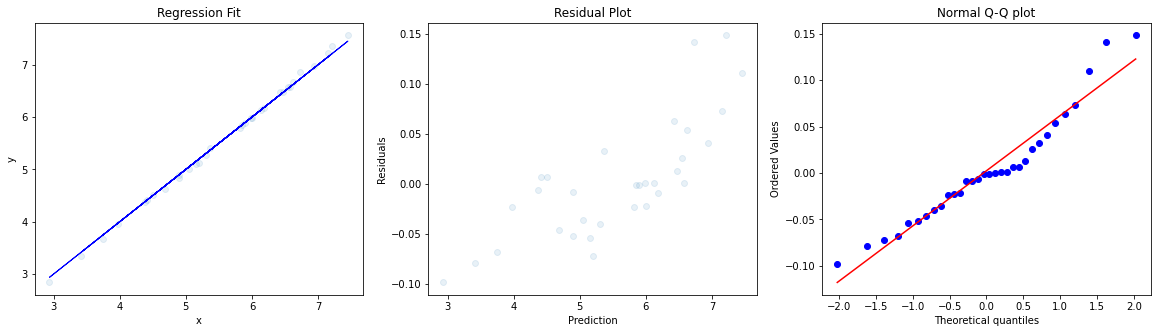

In [31]:
diagnostic_plot(ridge_predict, y_test)

## 5. Huber Regression
Huber regression is a linear regression model that is robust to outliers and uses the Huber loss function, which makes sure that the loss function is not heavily influenced by the outliers while not completely ignoring their effect.

In [32]:
from sklearn.linear_model import HuberRegressor

hub = HuberRegressor()
hub.fit(X_train, y_train)

HuberRegressor()

In [33]:
cv_hub_train = cross_val_score(hub, X_train, y_train, cv = validation_type, scoring = "r2")
cv_hub_test = cross_val_score(hub, X_test, y_test, cv = validation_type, scoring = "r2")
print(f"train: {cv_hub_train}")
print(f"test: {cv_hub_test}")
print()
print(f"Huber Regression R^2 (train): {cv_hub_train.mean():.3f}")
print(f"Huber Regression R^2 (test): {cv_hub_test.mean():.3f}")
print()

hub_predict = hub.predict(X_test)
print(f"Huber Regression MSE (test): {mean_squared_error(y_test, hub_predict):.3f}")
print(f"Huber Regression RMSE (test): {np.sqrt(mean_squared_error(y_test, hub_predict)):.3f}")

train: [0.99999994 0.99999992 0.99999993 0.99999996 0.99999994 0.99999992
 0.99999991 0.99999991 0.99999989 0.99999974]
test: [0.99999996 0.99999907 0.99999988 0.99999985 0.9999999  0.99999992
 0.99999987 0.99999922 0.99999996 0.99999985]

Huber Regression R^2 (train): 1.000
Huber Regression R^2 (test): 1.000

Huber Regression MSE (test): 0.000
Huber Regression RMSE (test): 0.000


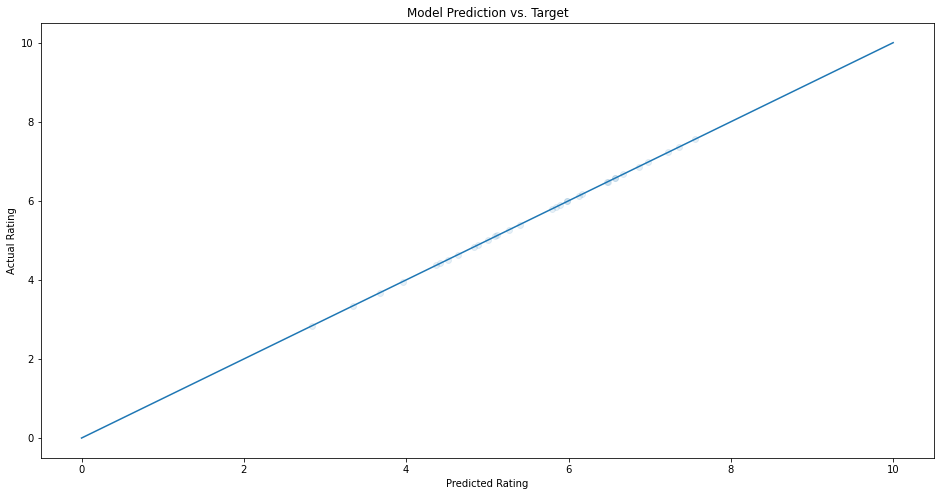

In [34]:
f = plt.figure(figsize=(16, 8))
plt.scatter(hub_predict, y_test, alpha = 0.1)
plt.plot(np.linspace(0, 10), np.linspace(0, 10))
plt.title('Model Prediction vs. Target')
plt.xlabel('Predicted Rating')
plt.ylabel('Actual Rating');

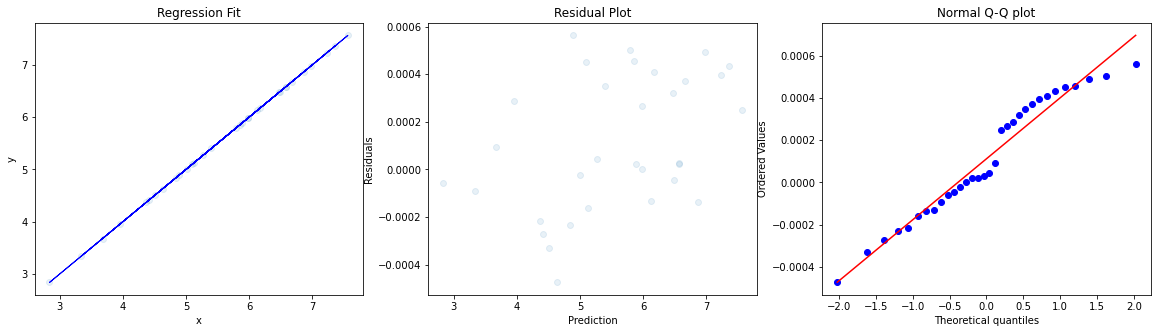

In [35]:
diagnostic_plot(hub_predict, y_test)

# Conclusion of Regression Models
Going off **MSE** and **R^2** values, Huber and Linear regression seem to be the best model for our data as they have the lowest MSE and highest R^2. The other models, although useful in theory, could be ineffective on our dataset as our data set only has 157 rows, which is rather low.

We have decided that Huber Regression is the best model for our data as it takes into account outliers in the data that may exist, while Linear Regresssion does not. Going forward, we will be making use of Huber Regressor when predicting future Happiness Score in the next notebook: machine_learning.